# Model

In [106]:
from pandas import DataFrame, read_csv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, LabelEncoder,
                                   OneHotEncoder, OrdinalEncoder, FunctionTransformer,
                                   PowerTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

import numpy as np

In [107]:
df_full = read_csv('biens_features.csv', sep=";", index_col = 0)
df_full

,idannonce,typedebien,typedetransaction,codepostal,ville,etage,idtypechauffage,idtypecuisine,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,nb_photos,prix,surface
0,149067859,Maison / Villa,['vente'],33000,bordeaux,0,gaz,équipée,1,0,3,4,1,0,6,444000,91
1,145969617,Maison / Villa,['vente de prestige'],33200,bordeaux,0,gaz,équipée,1,0,4,8,1,0,14,799000,200
2,153438365,Maison / Villa,['vente'],33000,bordeaux,0,individuel électrique,américaine équipée,1,0,2,3,0,1,16,350000,46
3,154455535,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,0,5,6,1,1,10,832000,165
4,154978131,Maison / Villa,['vente'],33300,bordeaux,0,0,aucune,1,0,3,4,0,1,4,385000,94
5,154962369,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,0,5,7,1,1,8,728000,160
6,154778993,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,1,6,7,0,1,10,729000,150
7,138311591,Maison / Villa,['vente de prestige'],33000,bordeaux,0,climatisation réversible,équipée,1,0,4,6,1,1,17,670000,182
8,150484811,Maison / Villa,['vente'],33000,bordeaux,0,individuel gaz,0,1,0,3,4,1,0,6,399190,75
9,154141679,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz,séparée équipée,1,0,5,7,1,1,9,850000,195


In [108]:
df_full.describe()

,idannonce,codepostal,etage,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,nb_photos,prix
count,1.575000e+03,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1.575000e+03
mean,1.520413e+08,33144.704762,1.017143,1.021587,0.156825,3.311111,4.892698,0.773333,0.699683,7.132063,5.960362e+05
std,3.799638e+06,173.996374,1.964187,0.187382,0.363752,1.561439,1.987391,0.418808,0.458542,2.509769,3.061200e+05
min,1.192292e+08,33000.000000,-2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.515117e+08,33000.000000,0.000000,1.000000,0.000000,2.000000,3.000000,1.000000,0.000000,6.000000,3.499950e+05
50%,1.531383e+08,33200.000000,0.000000,1.000000,0.000000,3.000000,5.000000,1.000000,1.000000,7.000000,5.700000e+05
75%,1.540199e+08,33200.000000,1.000000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,8.000000,8.700000e+05
max,1.557149e+08,33800.000000,16.000000,3.000000,1.000000,9.000000,12.000000,1.000000,1.000000,33.000000,2.625000e+06


## Cleaning

In [109]:
df_full.columns

Index(['idannonce', 'typedebien', 'typedetransaction', 'codepostal', 'ville',
       'etage', 'idtypechauffage', 'idtypecuisine', 'naturebien', 'si_balcon',
       'nb_chambres', 'nb_pieces', 'si_sdbain', 'si_sdEau', 'nb_photos',
       'prix', 'surface'],
      dtype='object')

In [110]:
df_full.isna().sum()

idannonce            0
typedebien           0
typedetransaction    0
codepostal           0
ville                0
etage                0
idtypechauffage      0
idtypecuisine        0
naturebien           0
si_balcon            0
nb_chambres          0
nb_pieces            0
si_sdbain            0
si_sdEau             0
nb_photos            0
prix                 0
surface              0
dtype: int64

In [111]:
chauffageNArows = df_full['idtypechauffage'] == "0"
df_full.loc[chauffageNArows,['idtypechauffage']] = np.nan

In [112]:
cuisineNArows = df_full['idtypecuisine'] == "0"
df_full.loc[cuisineNArows,'idtypecuisine'] = np.nan

In [113]:
df_full['surface']= df_full['surface'].str.replace(',', '.')
df_full['surface'] = df_full['surface'].astype(float)

In [114]:
df_full.dtypes

idannonce              int64
typedebien            object
typedetransaction     object
codepostal             int64
ville                 object
etage                  int64
idtypechauffage       object
idtypecuisine         object
naturebien             int64
si_balcon              int64
nb_chambres            int64
nb_pieces              int64
si_sdbain              int64
si_sdEau               int64
nb_photos              int64
prix                   int64
surface              float64
dtype: object

Suppression des biens de prix 0€

In [115]:
len(df_full.loc[df_full['prix']==0])

49

In [116]:
(df_full.loc[df_full['prix']==0]).index

Int64Index([ 123,  136,  172,  220,  885,  892,  935,  941,  947,  949,  972,
            1046, 1047, 1048, 1064, 1098, 1101, 1107, 1122, 1151, 1152, 1161,
            1170, 1178, 1192, 1193, 1198, 1209, 1245, 1279, 1295, 1296, 1311,
            1327, 1328, 1334, 1347, 1348, 1352, 1360, 1370, 1388, 1409, 1424,
            1476, 1507, 1515, 1534, 1544],
           dtype='int64')

In [117]:
df_full = df_full.drop((df_full.loc[df_full['prix']==0]).index, axis=0)

Suppresion des outliers

In [118]:
(df_full.loc[df_full['prix']> 2500000]).index

Int64Index([88, 115], dtype='int64')

In [119]:
df_full = df_full.drop((df_full.loc[df_full['prix']> 2500000]).index, axis=0)

In [120]:
df_full

,idannonce,typedebien,typedetransaction,codepostal,ville,etage,idtypechauffage,idtypecuisine,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,nb_photos,prix,surface
0,149067859,Maison / Villa,['vente'],33000,bordeaux,0,gaz,équipée,1,0,3,4,1,0,6,444000,91.00
1,145969617,Maison / Villa,['vente de prestige'],33200,bordeaux,0,gaz,équipée,1,0,4,8,1,0,14,799000,200.00
2,153438365,Maison / Villa,['vente'],33000,bordeaux,0,individuel électrique,américaine équipée,1,0,2,3,0,1,16,350000,46.00
3,154455535,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,0,5,6,1,1,10,832000,165.00
4,154978131,Maison / Villa,['vente'],33300,bordeaux,0,NaN,aucune,1,0,3,4,0,1,4,385000,94.00
5,154962369,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,0,5,7,1,1,8,728000,160.00
6,154778993,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz radiateur,séparée,1,1,6,7,0,1,10,729000,150.00
7,138311591,Maison / Villa,['vente de prestige'],33000,bordeaux,0,climatisation réversible,équipée,1,0,4,6,1,1,17,670000,182.00
8,150484811,Maison / Villa,['vente'],33000,bordeaux,0,individuel gaz,NaN,1,0,3,4,1,0,6,399190,75.00
9,154141679,Maison / Villa,['vente de prestige'],33000,bordeaux,0,gaz,séparée équipée,1,0,5,7,1,1,9,850000,195.00


C:\Users\utilisateur\Anaconda3\envs\machine_learning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


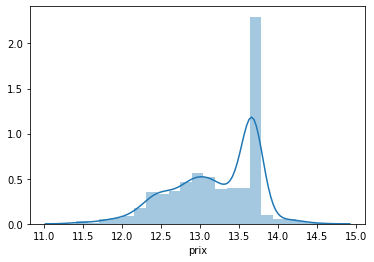

In [121]:
sns.distplot(np.log(df_full['prix']))

In [122]:
df_full.drop(['idannonce', 'ville', 'nb_photos'], inplace=True, axis=1)
#df_full.drop(['idannonce', 'ville'], inplace=True, axis=1)
df_full

,typedebien,typedetransaction,codepostal,etage,idtypechauffage,idtypecuisine,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,prix,surface
0,Maison / Villa,['vente'],33000,0,gaz,équipée,1,0,3,4,1,0,444000,91.00
1,Maison / Villa,['vente de prestige'],33200,0,gaz,équipée,1,0,4,8,1,0,799000,200.00
2,Maison / Villa,['vente'],33000,0,individuel électrique,américaine équipée,1,0,2,3,0,1,350000,46.00
3,Maison / Villa,['vente de prestige'],33000,0,gaz radiateur,séparée,1,0,5,6,1,1,832000,165.00
4,Maison / Villa,['vente'],33300,0,NaN,aucune,1,0,3,4,0,1,385000,94.00
5,Maison / Villa,['vente de prestige'],33000,0,gaz radiateur,séparée,1,0,5,7,1,1,728000,160.00
6,Maison / Villa,['vente de prestige'],33000,0,gaz radiateur,séparée,1,1,6,7,0,1,729000,150.00
7,Maison / Villa,['vente de prestige'],33000,0,climatisation réversible,équipée,1,0,4,6,1,1,670000,182.00
8,Maison / Villa,['vente'],33000,0,individuel gaz,NaN,1,0,3,4,1,0,399190,75.00
9,Maison / Villa,['vente de prestige'],33000,0,gaz,séparée équipée,1,0,5,7,1,1,850000,195.00


## Pipeline

In [123]:
categoricals = ['typedebien', 'typedetransaction','idtypechauffage', 'idtypecuisine', 'naturebien', 'codepostal']
binaries = ['si_balcon','si_sdbain','si_sdEau']
#numericals = ['nb_chambres', 'nb_pieces', 'nb_photos', 'etage', 'surface']
numericals = ['nb_chambres', 'nb_pieces', 'etage', 'surface']

### Categorical features

In [124]:
for col in categoricals:
    print(df_full[col].unique())

['Maison / Villa' 'Hôtel particulier' 'Appartement' 'Loft/Atelier/Surface']
["['vente']" "['vente de prestige']"]
['gaz' 'individuel électrique' 'gaz radiateur' nan
 'climatisation réversible' 'individuel gaz' 'électrique mixte'
 'individuel gaz sol' 'individuel' 'électrique'
 'individuel électrique radiateur' 'sol' 'individuel gaz radiateur'
 'climatisation réversible individuelle' 'central' '24704'
 'individuel fuel radiateur' 'central radiateur' 'électrique radiateur'
 'fuel radiateur' 'individuel sol' 'individuel gaz mixte'
 'gaz collectif mixte' 'central sol' 'central électrique' 'gaz collectif'
 'gaz collectif radiateur' 'gaz collectif sol' 'radiateur' 'mixte'
 'individuel mixte' 'climatisation réversible centrale'
 'central électrique radiateur' 'individuel radiateur']
['équipée' 'américaine équipée' 'séparée' 'aucune' nan 'séparée équipée'
 'américaine' 'coin cuisine' 'coin cuisine équipé']
[1 3 2]
[33000 33200 33300 33800 33100 33700 33110]


In [125]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

### Binary features

In [126]:
for col in binaries:
    print(df_full[col].unique())

[0 1]
[1 0]
[0 1]


In [127]:
binary_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

### Numerical features

In [128]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

### preprocessing pipe

In [129]:
preprocess_pipe = ColumnTransformer([
    ('cat', categorical_pipe, categoricals),
    ('num', numerical_pipe, numericals),
    ('ord', binary_pipe, binaries)
])

### regression model

In [130]:
regressor = Ridge()

In [131]:
model = Pipeline([
    ('pre', preprocess_pipe),
    ('reg', regressor)
])

In [132]:
from sklearn.model_selection import train_test_split
target_column = "prix"

X_fulltrain = df_full.drop(target_column, axis=1)
y_fulltrain = df_full[target_column]

X_train, X_valid, y_train, y_valid = train_test_split(X_fulltrain, y_fulltrain, test_size=0.1, random_state=42)

## Training and evaluation

In [133]:
X_train

,typedebien,typedetransaction,codepostal,etage,idtypechauffage,idtypecuisine,naturebien,si_balcon,nb_chambres,nb_pieces,si_sdbain,si_sdEau,surface
322,Maison / Villa,['vente de prestige'],33800,0,NaN,NaN,1,0,5,6,1,1,150.00
283,Maison / Villa,['vente de prestige'],33000,0,individuel électrique,coin cuisine équipé,1,0,3,4,1,0,92.00
15,Maison / Villa,['vente de prestige'],33000,0,individuel gaz,NaN,1,0,6,10,1,1,290.00
786,Maison / Villa,['vente de prestige'],33200,0,individuel,séparée équipée,1,0,5,7,1,1,192.00
380,Maison / Villa,['vente de prestige'],33200,0,individuel,séparée équipée,1,0,5,7,1,1,192.00
180,Maison / Villa,['vente'],33000,0,électrique,aucune,1,0,3,5,0,1,108.00
992,Appartement,['vente de prestige'],33000,1,individuel gaz radiateur,américaine équipée,1,1,3,4,1,1,108.00
1462,Appartement,['vente'],33000,2,individuel électrique radiateur,NaN,1,1,2,3,1,0,66.00
1399,Appartement,['vente de prestige'],33000,0,électrique,aucune,1,0,2,3,0,0,72.00
295,Maison / Villa,['vente de prestige'],33000,0,individuel,américaine équipée,1,0,7,8,1,0,200.00


In [134]:
model.fit(X_train,y_train);

In [135]:
y_valid_pred = model.predict(X_valid)
r2 = r2_score(y_valid, y_valid_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
mae = mean_absolute_error(y_valid, y_valid_pred)
print(f'r2={r2}\nrmse={rmse}') #changer en MAE


r2=0.8854405080074799
rmse=94352.91873555181


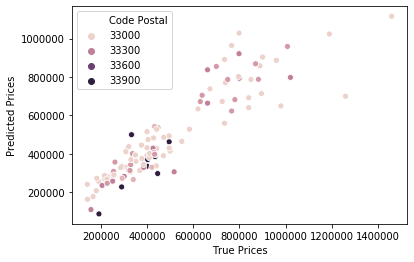

In [136]:
predictions = DataFrame(y_valid)
predictions.columns=["True Prices"]
predictions["Predicted Prices"] = y_valid_pred
predictions["Code Postal"]=X_valid["codepostal"]
predictions

sns.scatterplot(x=predictions["True Prices"], y=predictions["Predicted Prices"], hue=predictions["Code Postal"]);


C:\Users\utilisateur\Anaconda3\envs\machine_learning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


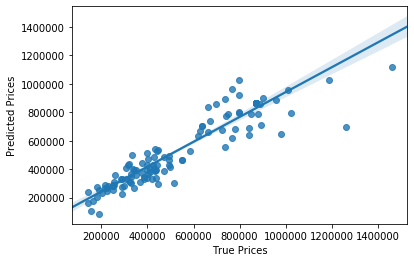

In [137]:

sns.regplot(x=predictions["True Prices"], y=predictions["Predicted Prices"]);


In [138]:
mae = round(mean_absolute_error(y_valid, y_valid_pred))
print(f'mae={mae}€')

mae=56350.0€


In [139]:
mape = round(np.mean(np.abs((y_valid - y_valid_pred) / y_valid)) * 100, 1)
print(f'mape={mape}%')

mape=11.9%


In [140]:
import pickle

filename = 'model_maisons_apparts.pickle'
pickle.dump(model, open(filename, 'wb'))